In [1]:
import pandas as pd
import json

# Let's see how much each mall overlaps with other malls

In [11]:
# Function to calculate the overlap percentage for each mall in the dataset
def calculate_mall_overlap(all_malls_data):
    overlap_percentages = {}

    for mall_name, details in all_malls_data.items():
        current_mall_shops = set(details['shops'])
        overlap_counts = []

        for other_mall, other_details in all_malls_data.items():
            if other_mall == mall_name:
                continue  # Skip comparison with itself

            other_mall_shops = set(other_details['shops'])
            overlap = current_mall_shops.intersection(other_mall_shops)
            overlap_counts.append(len(overlap))

        # Calculate and store the overlap percentage for the current mall
        if current_mall_shops:
            overlap_percentage = sum(overlap_counts) / len(current_mall_shops) * 100
        else:
            overlap_percentage = 0

        overlap_percentages[mall_name] = overlap_percentage

    return overlap_percentages


In [47]:
# Specify the file path
file_path = "final_mall_data.json"

# Open the file and load the JSON data
with open(file_path, "r") as file:
    all_malls_data = json.load(file)

In [5]:
all_malls_data

{'Clarke Quay Central': {'name': 'Clarke Quay Central',
  'shops': ['1ST EYE CARE',
   '3DSENSE MEDIA SCHOOL',
   'A.M AESTHETICS',
   'ADVENTURE 21',
   'ANGELS & CO. OSSTEM DENTAL IMPLANT CENTRE',
   'ASTONS SPECIALITIES',
   'AUBE BEAUTY SALON',
   'AZABU SABO HOKKAIDO ICE-CREAM SHOP',
   'BARCOOK BAKERY',
   'BEAUTE HUB',
   'BONES ‘N SLAW',
   'BURGER KING',
   'CASE LOGIC',
   'CASH STUDIO',
   'CHARLES & KEITH',
   'CHEERS',
   'CHONG HOE HEALTHCARE',
   'COLOR MOON ART STUDIO',
   'CRAFTSMEN SPECIALTY COFFEE',
   'THREEPPY',
   'DON DON DONKI',
   'DON DON DONKI FOOD HALL',
   'DUMPRINCE DUMPLING HOUSE',
   'E!GHT KOREAN BBQ',
   "E'BOUNTY SKINCARE",
   'ELAN HAIR STUDIO',
   'ESPECIAL BEAUTE',
   'EVOLVE MMA',
   'EYE STUDIO TOKYO',
   'FIRMAN SHAH ISLAND',
   'FRANK ZUO STUDIO',
   'FRESHE BEAUTE',
   'GRACE NAIL',
   'GUARDIAN',
   'HANAMI BARBER',
   'HITOYOSHI YOSHI SUSHI',
   'HUGGS COFFEE',
   'INTO BEAUTY',
   'ISLAND SHOP',
   'IZUMI AESTHETICS',
   'KAI KAI GIFTS',
  

In [48]:
# Calculate the overlap percentage for all malls in the dataset
mall_overlap_percentages = calculate_mall_overlap(all_malls_data)

mall_overlap_percentages

{'Clarke Quay Central': 327.58620689655174,
 'Holland Village Shopping Mall': 490.625,
 'Square 2': 366.1870503597122,
 'Greenwich V': 1015.3846153846154,
 'HillV2': 756.6666666666666,
 'Icon Village': 103.03030303030303,
 'Junction 10': 365.8536585365854,
 'Far East Square': 121.875,
 'Katong V': 38.70967741935484,
 'Lucky Chinatown': 250.0,
 'Pacific Plaza': 156.0,
 'Woods Square': 671.4285714285714,
 'West Coast Plaza': 486.4583333333333,
 'The Centrepoint': 347.4074074074074,
 'Century Square': 631.081081081081,
 'Causeway Point': 958.2222222222223,
 'i12': 361.6,
 'Raffles City': 553.2258064516129,
 'Sengkang Grand Mall': 908.421052631579,
 'Bukit Panjang Plaza': 1036.065573770492,
 'CQ @ Clarke Quay': 27.500000000000004,
 'Singpost Centre': 602.4193548387098,
 'Bugis Street': 68.67469879518072,
 'arc': 780.0,
 'ION Orchard': 502.56410256410254,
 'Hougang Mall': 1276.4705882352941,
 'Northpoint City': 791.1458333333333,
 'City Square Mall': 941.578947368421,
 'White Sands': 1222.2

<Axes: xlabel='Mall', ylabel='Overlap Percentage'>

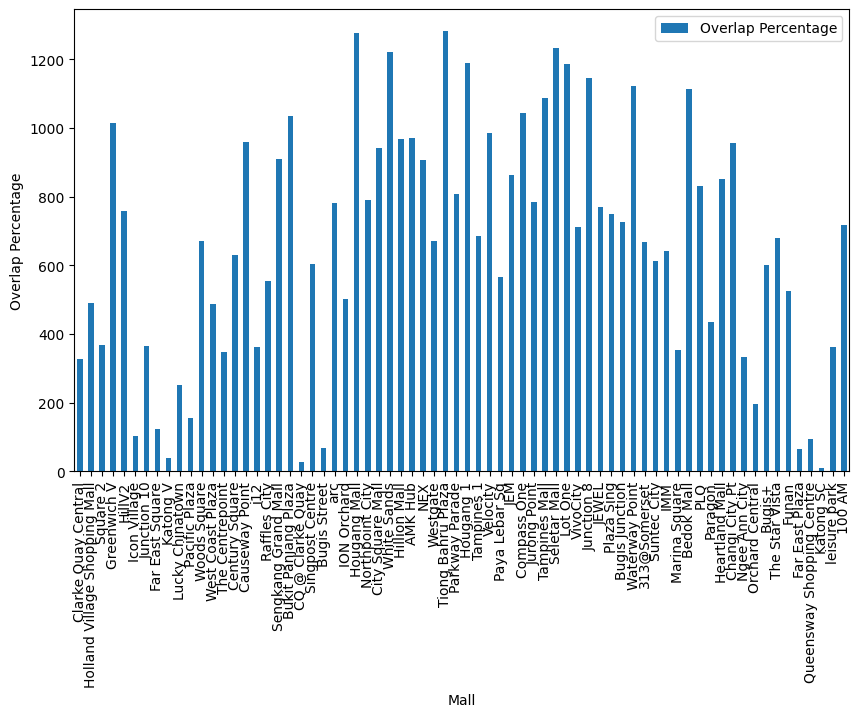

In [51]:
df = pd.DataFrame.from_dict(mall_overlap_percentages, orient='index', columns=['Overlap Percentage'])
df.plot(kind='bar', xlabel='Mall', ylabel='Overlap Percentage', figsize=(10, 6))


<Axes: xlabel='Overlap Percentage', ylabel='Mall'>

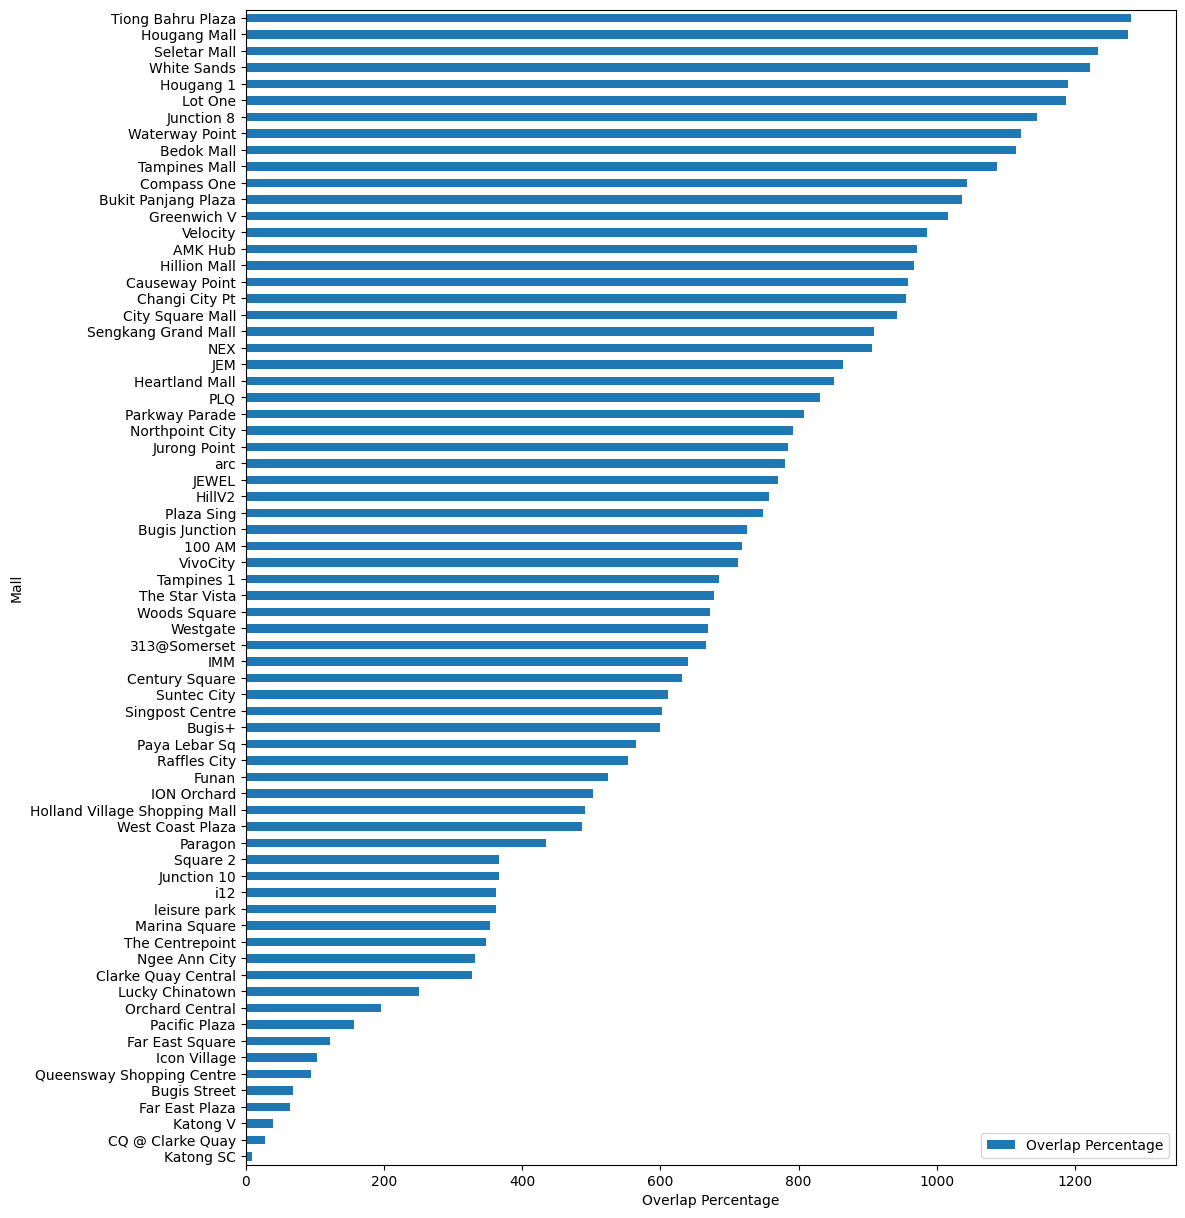

In [50]:
df_sorted = df.sort_values(by='Overlap Percentage', ascending=True)
df_sorted.plot(kind='barh', xlabel='Overlap Percentage', ylabel='Mall', figsize=(12, 15))


# Let's try the scoring method

In [52]:
from collections import Counter

def calculate_mall_generic_scores(dataset_path):
    # Load the dataset
    with open(dataset_path, 'r') as file:
        data = json.load(file)

    # Count shop frequencies across the entire dataset
    all_shops = [shop for mall_details in data.values() for shop in mall_details['shops']]
    shop_frequencies = Counter(all_shops)

    # Total number of unique shops to determine the starting rank for the least frequent shop
    total_unique_shops = len(shop_frequencies)

    # Assign ranks based on frequencies (less frequent = lower rank number)
    shop_ranks = {shop: total_unique_shops - rank for rank, (shop, _) in enumerate(shop_frequencies.most_common(), start=0)}

    # Initialize a dictionary to hold the uniqueness scores for all malls
    mall_scores = {}

    # Iterate over all malls in the dataset and calculate their scores
    for mall_name, details in data.items():
        mall_shops = details['shops']
        if not mall_shops:  # Skip malls with no shops listed
            continue
        # Sum ranks of all shops in the mall and divide by the total number of shops to get the average rank (score)
        generic_score = sum(shop_ranks.get(shop, total_unique_shops) for shop in mall_shops) / len(mall_shops)
        mall_scores[mall_name] = generic_score

    return mall_scores


In [54]:
# Example usage of the function
# Replace 'path_to_your_dataset.json' with the actual path to your JSON dataset file
genericity_scores = calculate_mall_generic_scores('final_mall_data.json')

genericity_scores

{'Clarke Quay Central': 3599.862068965517,
 'Holland Village Shopping Mall': 3771.6458333333335,
 'Square 2': 3642.9208633093526,
 'Greenwich V': 3973.9615384615386,
 'HillV2': 3636.5,
 'Icon Village': 3143.181818181818,
 'Junction 10': 3619.560975609756,
 'Far East Square': 3167.78125,
 'Katong V': 3196.7096774193546,
 'Lucky Chinatown': 3242.346153846154,
 'Pacific Plaza': 3070.72,
 'Woods Square': 4015.0285714285715,
 'West Coast Plaza': 3571.4479166666665,
 'The Centrepoint': 3441.088888888889,
 'Century Square': 3981.912162162162,
 'Causeway Point': 4198.568888888889,
 'i12': 3432.032,
 'Raffles City': 3648.532258064516,
 'Sengkang Grand Mall': 4100.094736842106,
 'Bukit Panjang Plaza': 4080.1721311475408,
 'CQ @ Clarke Quay': 2708.525,
 'Singpost Centre': 3752.6935483870966,
 'Bugis Street': 2543.952,
 'arc': 3521.4615384615386,
 'ION Orchard': 3509.970802919708,
 'Hougang Mall': 4222.882352941177,
 'Northpoint City': 3987.2604166666665,
 'City Square Mall': 3874.7842105263157,
 

<Axes: xlabel='Genericity Score', ylabel='Mall'>

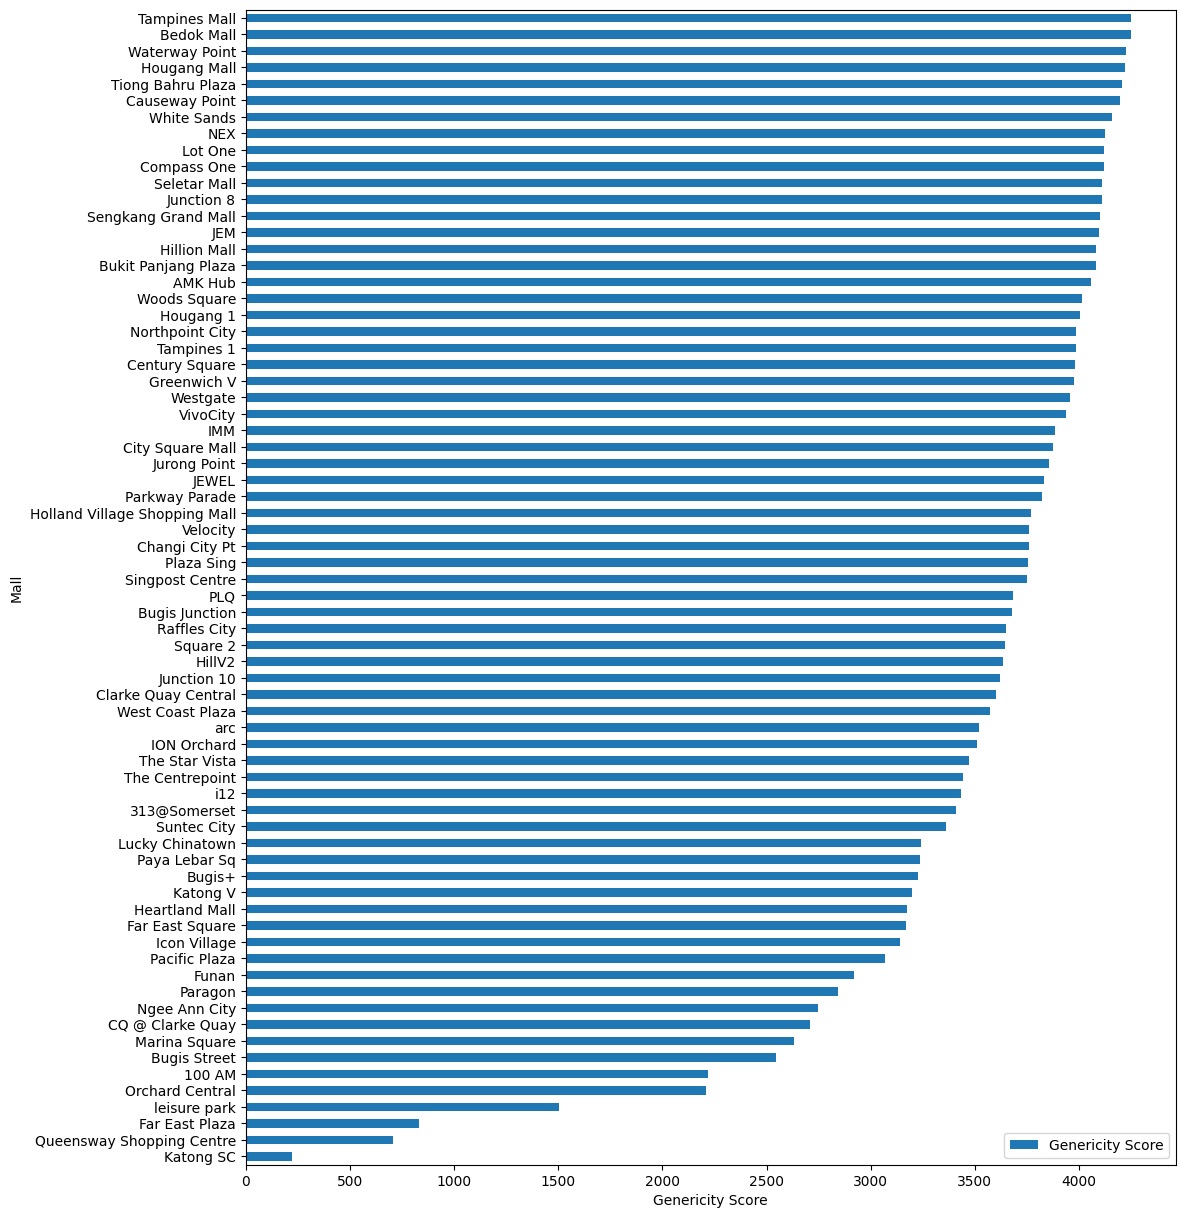

In [55]:
df_scores = pd.DataFrame.from_dict(genericity_scores, orient='index', columns=['Genericity Score'])
df_scores_sorted = df_scores.sort_values(by='Genericity Score', ascending=True)
df_scores_sorted.plot(kind='barh', xlabel='Genericity Score', ylabel='Mall', figsize=(12, 15))


# Making the scores more readable

In [56]:
import json
from collections import Counter

def calculate_mall_uniqueness_scores_base_10(dataset_path):
    # Load the dataset from the provided JSON file
    with open(dataset_path, 'r') as file:
        data = json.load(file)

    # Create a list of all shops across all malls in the dataset
    all_shops = [shop for mall_details in data.values() for shop in mall_details['shops']]

    # Count the frequency of each shop's appearance in the dataset
    shop_frequencies = Counter(all_shops)

    # Assign ranks to each shop based on its frequency, with less frequent shops getting lower rank numbers
    # The most unique shop (appearing least frequently) gets a rank of 1
    shop_ranks = {shop: rank for rank, shop in enumerate(sorted(shop_frequencies, key=shop_frequencies.get), start=1)}

    # Initialize a dictionary to hold the calculated uniqueness scores for each mall
    mall_scores = {}

    # Iterate over each mall in the dataset
    for mall_name, details in data.items():
        mall_shops = details['shops']  # Get the list of shops for the current mall

        # Skip the mall if it has no shops listed
        if not mall_shops:
            continue

        # Calculate the generic score for the mall by averaging the ranks of its shops
        # Shops not found in the ranks dictionary are treated as having the highest rank (least unique)
        generic_score = sum(shop_ranks.get(shop, 0) for shop in mall_shops) / len(mall_shops)
        
        # Store the calculated score in the mall_scores dictionary
        mall_scores[mall_name] = generic_score

    # Find the maximum score among all malls to use for normalization
    max_score = max(mall_scores.values(), default=0)

    # Normalize the scores to a base-10 scale, where the highest score is scaled down to 10
    # If max_score is 0 (to avoid division by zero), assign a score of 0
    base_10_scores = {mall: (score / max_score) * 10 if max_score else 0 for mall, score in mall_scores.items()}

    # Return the dictionary of normalized base-10 uniqueness scores for each mall
    return base_10_scores


In [58]:
# Example usage of the function
# Replace 'path_to_your_dataset.json' with the actual path to your JSON dataset file
uniqueness_scores_base_10 = calculate_mall_uniqueness_scores_base_10('final_mall_data.json')

uniqueness_scores_base_10

{'Clarke Quay Central': 3.181228146687048,
 'Holland Village Shopping Mall': 4.947357858585377,
 'Square 2': 4.35145231286986,
 'Greenwich V': 6.912147550652027,
 'HillV2': 4.1605018437874195,
 'Icon Village': 1.0608560870980372,
 'Junction 10': 4.871500098586214,
 'Far East Square': 1.7242167626786449,
 'Katong V': 2.3788864481000123,
 'Lucky Chinatown': 2.5139549984808855,
 'Pacific Plaza': 1.5611059150130167,
 'Woods Square': 7.757734928644194,
 'West Coast Plaza': 5.124561765389222,
 'The Centrepoint': 4.679056547447656,
 'Century Square': 7.928434835965471,
 'Causeway Point': 8.973669087320262,
 'i12': 5.314953205330601,
 'Raffles City': 6.682669090074719,
 'Sengkang Grand Mall': 8.780505424444222,
 'Bukit Panjang Plaza': 8.66548933294829,
 'CQ @ Clarke Quay': 2.631194857650079,
 'Singpost Centre': 7.435697085011389,
 'Bugis Street': 2.868752837168848,
 'arc': 7.026063230887461,
 'ION Orchard': 7.2245867137987,
 'Hougang Mall': 9.56546980973003,
 'Northpoint City': 8.9074670597994

<Axes: xlabel='Base 10 Score', ylabel='Mall'>

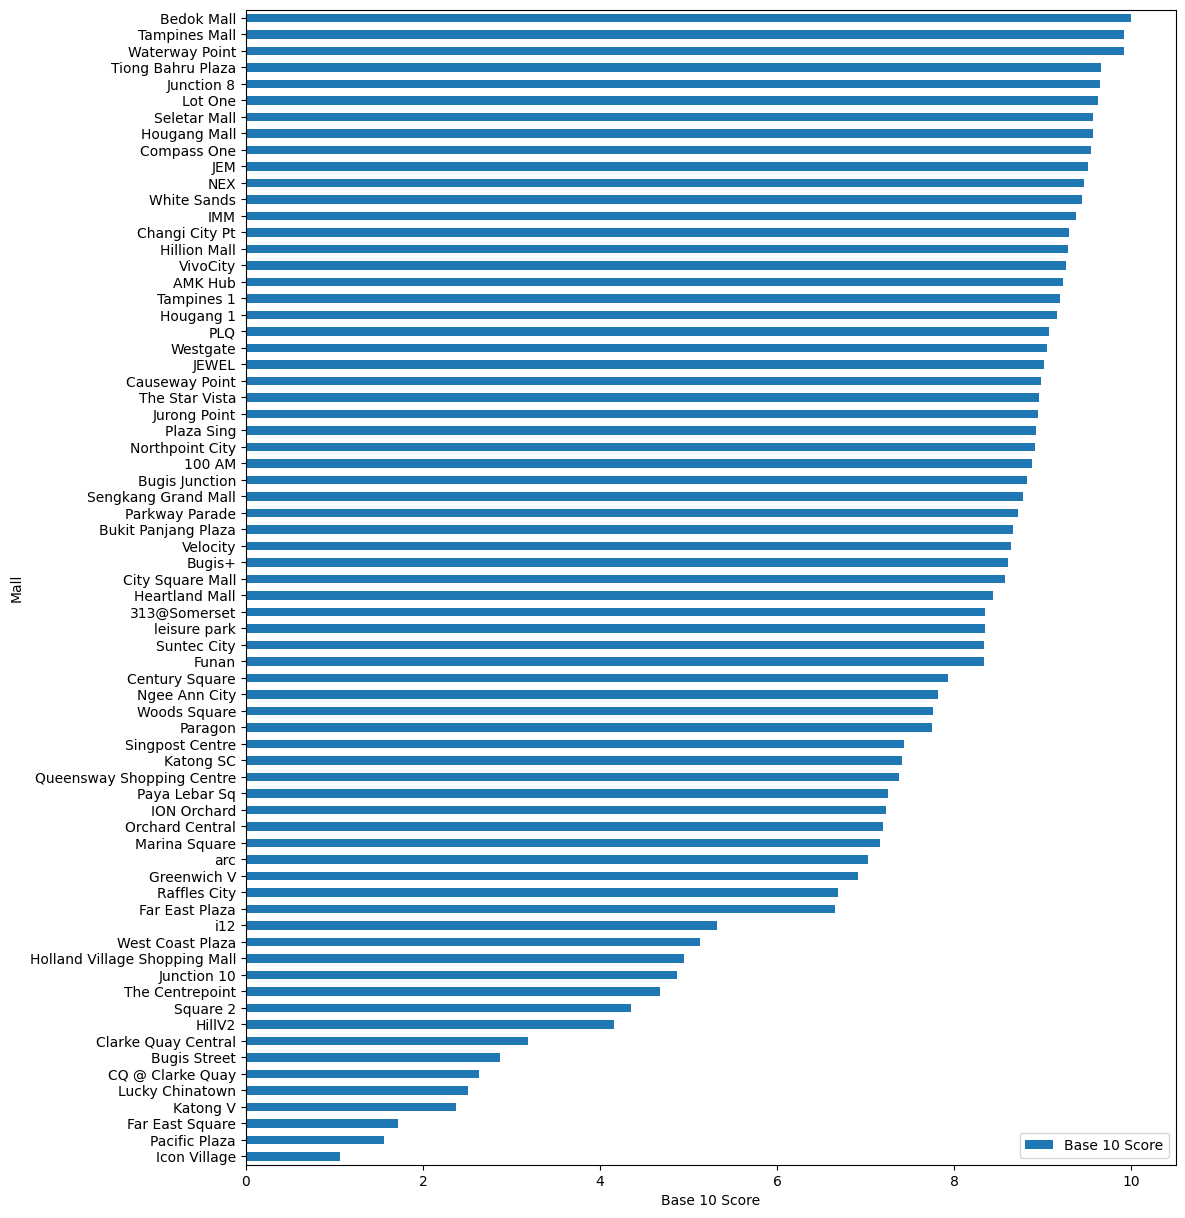

In [59]:
df_scores_base_10 = pd.DataFrame.from_dict(uniqueness_scores_base_10, orient='index', columns=['Base 10 Score'])
df_scores_base_10_sorted = df_scores_base_10.sort_values(by='Base 10 Score', ascending=True)
df_scores_base_10_sorted.plot(kind='barh', xlabel='Base 10 Score', ylabel='Mall', figsize=(12, 15))


In [60]:
df_scores_base_10_sorted

,Base 10 Score
Icon Village,1.060856
Pacific Plaza,1.561106
Far East Square,1.724217
Katong V,2.378886
Lucky Chinatown,2.513955
...,...
Junction 8,9.640438
Tiong Bahru Plaza,9.653457
Waterway Point,9.913968
Tampines Mall,9.917359


In [61]:
df_scores_base_10_sorted.to_csv('mall_genericity_scores.csv')


In [62]:
len(uniqueness_scores_base_10)

70

In [63]:
from collections import Counter

# Create a list of all shops across all malls in the dataset
all_shops = [shop for mall_details in all_malls_data.values() for shop in mall_details['shops']]

# Count the frequency of each shop's appearance in the dataset
shop_frequencies = Counter(all_shops)

# Create a dataframe from the shop frequencies
df_shop_frequencies = pd.DataFrame.from_dict(shop_frequencies, orient='index', columns=['Frequency'])

# Sort the dataframe by frequency in descending order
df_shop_frequencies_sorted = df_shop_frequencies.sort_values(by='Frequency', ascending=False)

df_shop_frequencies_sorted.head(10)


,Frequency
WATSONS,47
GUARDIAN,44
STARBUCKS,37
YA KUN KAYA TOAST,34
7-ELEVEN,34
LAC,34
LIHO TEA,34
SUBWAY,32
OLD CHANG KEE,32
CHALLENGER,32


In [77]:
html_table = df_shop_frequencies_sorted.head(10).to_html()
print(html_table)


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Frequency</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>WATSONS</th>
      <td>47</td>
    </tr>
    <tr>
      <th>GUARDIAN</th>
      <td>44</td>
    </tr>
    <tr>
      <th>STARBUCKS</th>
      <td>37</td>
    </tr>
    <tr>
      <th>YA KUN KAYA TOAST</th>
      <td>34</td>
    </tr>
    <tr>
      <th>7-ELEVEN</th>
      <td>34</td>
    </tr>
    <tr>
      <th>LAC</th>
      <td>34</td>
    </tr>
    <tr>
      <th>LIHO TEA</th>
      <td>34</td>
    </tr>
    <tr>
      <th>SUBWAY</th>
      <td>32</td>
    </tr>
    <tr>
      <th>OLD CHANG KEE</th>
      <td>32</td>
    </tr>
    <tr>
      <th>CHALLENGER</th>
      <td>32</td>
    </tr>
  </tbody>
</table>


In [71]:
df_shop_frequencies_sorted.tail(10)

,Frequency
RUBI SHOES,1
SAINT LAURENT,1
SEN-RYO,1
SINGAPORE AIRLINES SERVICE CENTRE,1
SKIN INC SUPPLEMENT BAR,1
SPA ELEMENTS,1
SU:M37,1
SUITSUPPLY,1
SUNDAY FOLKS,1
YAKINIKU HEIJOEN,1


In [72]:
# Create a list to store the number of shops in each mall
num_shops = []

# Iterate over each mall in the dataset
for mall_name, details in all_malls_data.items():
    mall_shops = details['shops']  # Get the list of shops for the current mall
    num_shops.append(len(mall_shops))  # Append the number of shops to the list

# Create a dataframe from the number of shops list
df_num_shops = pd.DataFrame({'Mall': list(all_malls_data.keys()), 'Number of Shops': num_shops})

df_num_shops


,Mall,Number of Shops
0,Clarke Quay Central,87
1,Holland Village Shopping Mall,96
2,Square 2,139
3,Greenwich V,26
4,HillV2,30
...,...,...
65,Far East Plaza,479
66,Queensway Shopping Centre,140
67,Katong SC,140
68,leisure park,57


In [74]:
df_num_shops.sort_values(by='Number of Shops', ascending=False)

,Mall,Number of Shops
65,Far East Plaza,479
26,Northpoint City,384
41,Jurong Point,368
45,VivoCity,349
31,NEX,331
...,...,...
8,Katong V,31
4,HillV2,30
9,Lucky Chinatown,26
3,Greenwich V,26


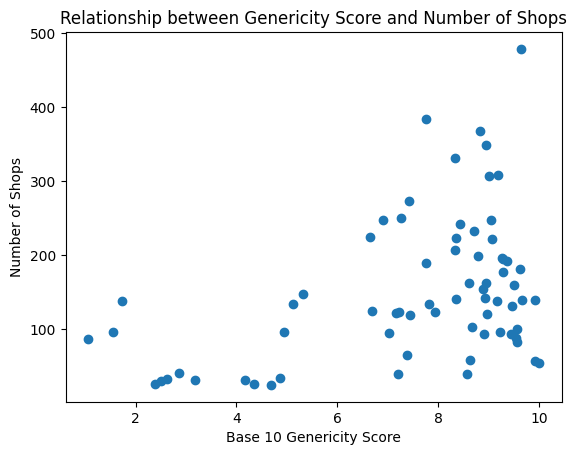

In [73]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df_scores_base_10_sorted['Base 10 Score'], df_num_shops['Number of Shops'])

# Set the labels and title
plt.xlabel('Base 10 Genericity Score')
plt.ylabel('Number of Shops')
plt.title('Relationship between Genericity Score and Number of Shops')

# Show the plot
plt.show()
